# Homework 2
In this homework you will learn how to train your first "deep" network in tensorflow. In addition we are going to collect some training data, for the next few assignments.

Development notes: 

1) If you are doing your homework in a Jupyter/iPython notebook you may need to 'Restart & Clear Output' after making a change and re-running a cell.  TensorFlow will not allow you to create multiple variables with the same name, which is what you are doing when you run a cell that creates a variable twice.<br/><br/>
2) Be careful with your calls to global_variables_initializer(). If you call it after training one network it will re-initialize your variables erasing your training.  In general, double check the outputs of your model after all training and before turning your model in. Ending a session will discard all your variable values.

## Part 0: Setup

In [1]:
import tensorflow as tf
import numpy as np
import util

I = tf.placeholder(tf.float32, (None,2), name='input')

# Give the datapoints a label 
labels = tf.cast(tf.reduce_sum(I*I, axis=1, keep_dims=True) < 1.0, tf.float32)

## Part 1: Linear Classifier

In [2]:
# Step 1: define the compute graph of your linear classifier

#sol to hw1: pi = tf.reduce_mean(tf.cast(tf.sqrt(1-I*I), tf.float32))
weights = tf.Variable(tf.random_normal([2,1], stddev=0.35), name="weights")
b = tf.Variable(tf.zeros(1), name="biases")
wx = tf.matmul(I, weights) + b
linear_output = tf.identity(wx, name='linear_output')

# Step 2: use a loss function over your classifier's predictions and the ground truth.
#loss_linear = tf.nn.sigmoid_cross_entropy_with_logits(labels=labels, logits=linear_output)
loss_linear = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=labels, logits=linear_output))

# Step 3: create an optimizer
optimizer = tf.train.MomentumOptimizer(0.1, 0.9)

# Step 4: use that optimizer on your loss function
minimizer_L = optimizer.minimize(loss_linear)


## Part 2: Non-Linear Classifier

In [3]:
# Step 1: define the compute graph of your non-linear classifier
# Note: use the same input and labels as your linear classifier, python variable 'I' with TF name 'input'
#       and python variable labels.
#       You will have two branches off the input, your linear and non-linear classifiers
nonlinear_weights = tf.Variable(tf.random_normal([2, 100], stddev=0.35), name="nonlinear_weights")
bias_nl = tf.Variable(tf.zeros(1), name="biases_nonlinear")
wx = tf.matmul(I, nonlinear_weights)
nl_function = tf.nn.relu(wx + bias_nl)
print (nl_function)

nonlinear_weights2 = tf.Variable(tf.random_normal([100,1], stddev=0.35), name="nonlinear_weights2")
bias_nl2 = tf.Variable(tf.zeros(1), name="biases_nonlinear2")
wx2 = tf.matmul(nl_function, nonlinear_weights2) + bias_nl2
nonlinear_output = tf.identity(wx2, name='nonlinear_output')
print (nonlinear_output)

# Step 2: use a loss function over your classifier's predictions and the ground truth.
loss_nonlinear = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=labels, logits=nonlinear_output))

# Step 3: create an optimizer
optimizer = tf.train.MomentumOptimizer(0.1, 0.9)

# Step 4: use that optimizer on your loss function
minimizer_NL = optimizer.minimize(loss_nonlinear)


Tensor("Relu:0", shape=(?, 100), dtype=float32)
Tensor("nonlinear_output:0", shape=(?, 1), dtype=float32)


## Part 3: Training

In [4]:
# Start a session
sess = tf.Session()

# Set up training
sess.run(tf.global_variables_initializer())

# Train linear network
for i in range(1000):
    test = np.random.random((1000,2))
    sess.run(minimizer_L, feed_dict={I:test})
    sess.run(minimizer_NL, feed_dict={I:test})


## Part 4: Visualization

### See your model

In [5]:
# Show the current graph
#util.show_graph(tf.get_default_graph().as_graph_def())

### See Learned Functions

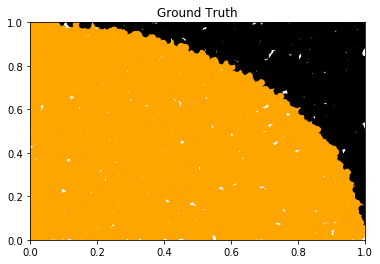

In [6]:
% matplotlib inline
import matplotlib.pyplot as plt

# Create sample data
num_viz_samples = 10000
viz_data = np.random.rand(num_viz_samples, 2)

labels_outputs = sess.run(labels, feed_dict={I: viz_data})

plt.xlim(0, 1)
plt.ylim(0, 1)

plt.title('Ground Truth')
    
colors = ['black' if l == 0 else 'orange' for l in labels_outputs]
plt.scatter(viz_data[:,0], viz_data[:,1], color=colors)
plt.show()

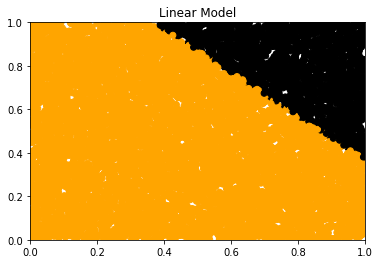

In [7]:
#################################
### Linear Classifier Outputs ###
#################################
linear_model_predictions = sess.run(linear_output, feed_dict={I: viz_data})
linear_model_predictions = (linear_model_predictions > 0).astype(int)

# Plot it
colors = ['black' if l == 0 else 'orange' for l in linear_model_predictions]
plt.title('Linear Model')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.scatter(viz_data[:,0], viz_data[:,1], color=colors)
plt.show()

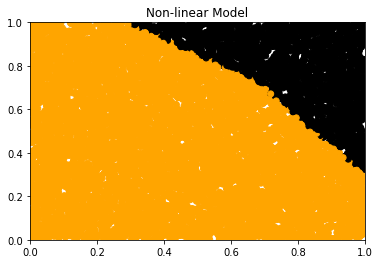

In [8]:
#####################################
### Non-Linear Classifier Outputs ###
#####################################
# Run it through the classifiers
nonlinear_model_predictions = sess.run(nonlinear_output, feed_dict={I: viz_data})
nonlinear_model_predictions = (nonlinear_model_predictions > 0).astype(int)

# Plot it
colors = ['black' if l == 0 else 'orange' for l in nonlinear_model_predictions]
plt.title('Non-linear Model')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.scatter(viz_data[:,0], viz_data[:,1], color=colors)
plt.show()

## Part 5: Save Model
Like homework 1 you are turning in your TensorFlow graph.  This time, however, you are saving the trained weights along with the structure.  This is very important because it shows you've trained the model!

In [9]:
util.save('assignment2.tfg', session=sess)
sess.close()